# Weight Agnostic Neural Networks - Exploration

# GA operations

## Imports

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')
os.getcwd()

'C:\\Users\\Breno\\Documents\\Academico\\Mestrado-PUC\\ML-Poggi\\wann\\wann2\\brain-tokyo-workshop\\WANNRelease\\WANN'

In [2]:
from wann_src.wann import loadHyp, updateHyp, Wann # WANN evolution
from wann_src.dataGatherer import DataGatherer
from wann_src.task import Task

from wann_src.ind import Ind, getNodeOrder, act, selectAct, getLayer, getNumLayers
from wann_train import gatherData

from domain import *   # Task environments
from domain.config import games

from vis.viewInd import viewPop, viewInd
from vis.viewRewards import plotIndReward, plotPopReward

## Parameters

In [3]:
fileName    = 'test'
hyp_default = 'p/default_wan.json'
hyp_adjust = 'p/xor.json'

In [4]:
global hyp
hyp = loadHyp(pFileName=hyp_default)
updateHyp(hyp,hyp_adjust)

hyp['popSize'] = 200
hyp['alg_probMoo'] = 0.80
hyp['MPIexec'] = False

data = DataGatherer(fileName, hyp)

	*** Running with hyperparameters:  p/xor.json 	***


## Weight Agnostic Neural Network Search


<img src="../img/schematic.png" width="600"/>

(source: https://weightagnostic.github.io/)

## Initialize WANN

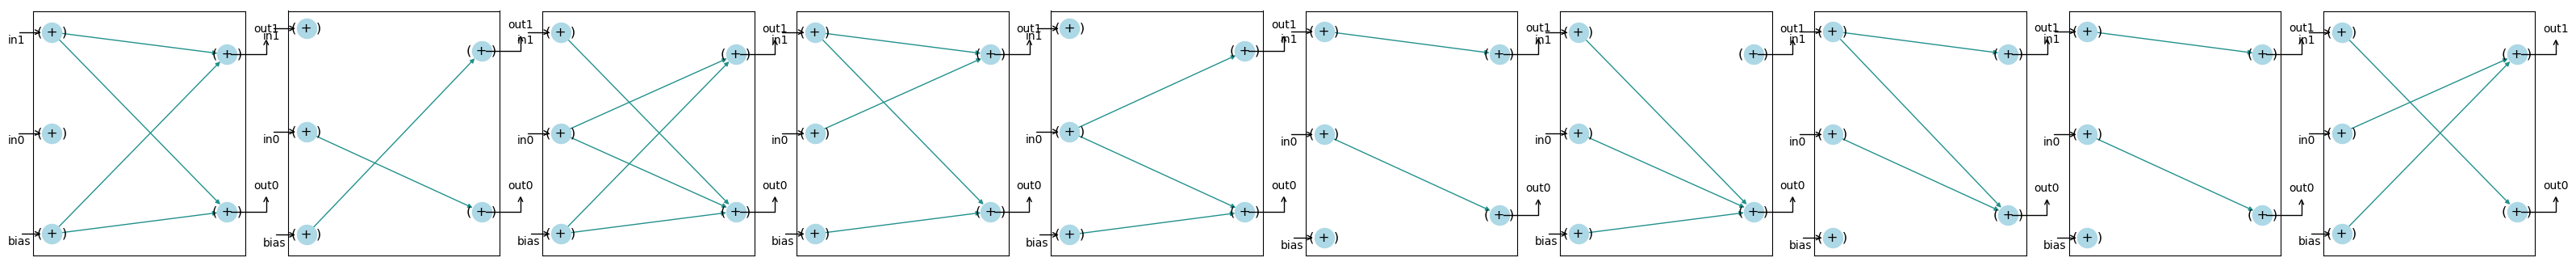

In [5]:
task = Task(games[hyp['task']], nReps=hyp['alg_nReps'], verbose=False)

wann = Wann(hyp)
pop = wann.ask()  
reward = task.evaluatePop(pop, hyp)  # Send pop to evaluate

fig = viewPop(pop[:10], 'xor', plt_height=4)

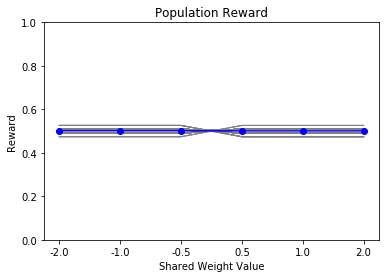

In [6]:
plotPopReward(pop, task, hyp)

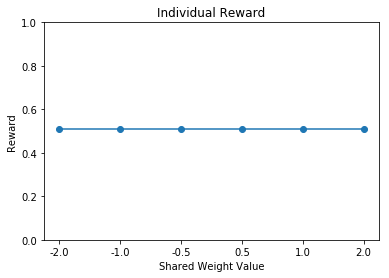

In [7]:
plotIndReward(pop[0], task, hyp)

## Evolve a few generations

0  -  | Elite Fit: 0.51 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  3.00
1  -  | Elite Fit: 0.52 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  0.00
2  -  | Elite Fit: 0.52 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  0.00
3  -  | Elite Fit: 0.56 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  0.00
4  -  | Elite Fit: 0.56 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  0.00
5  -  | Elite Fit: 0.56 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  5.00 | Med Conn:  0.00
6  -  | Elite Fit: 0.58 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  6.00 | Med Conn:  4.00
7  -  | Elite Fit: 0.60 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  7.00 | Med Conn:  5.00
8  -  | Elite Fit: 0.60 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  7.00 | Med Conn:  4.00
9  -  | Elite Fit: 0.60 | Best Fit:  0.64 | Best FitMax:  0.69 | Med Node:  7.00 | Med Conn:  4.00
10  -  | E

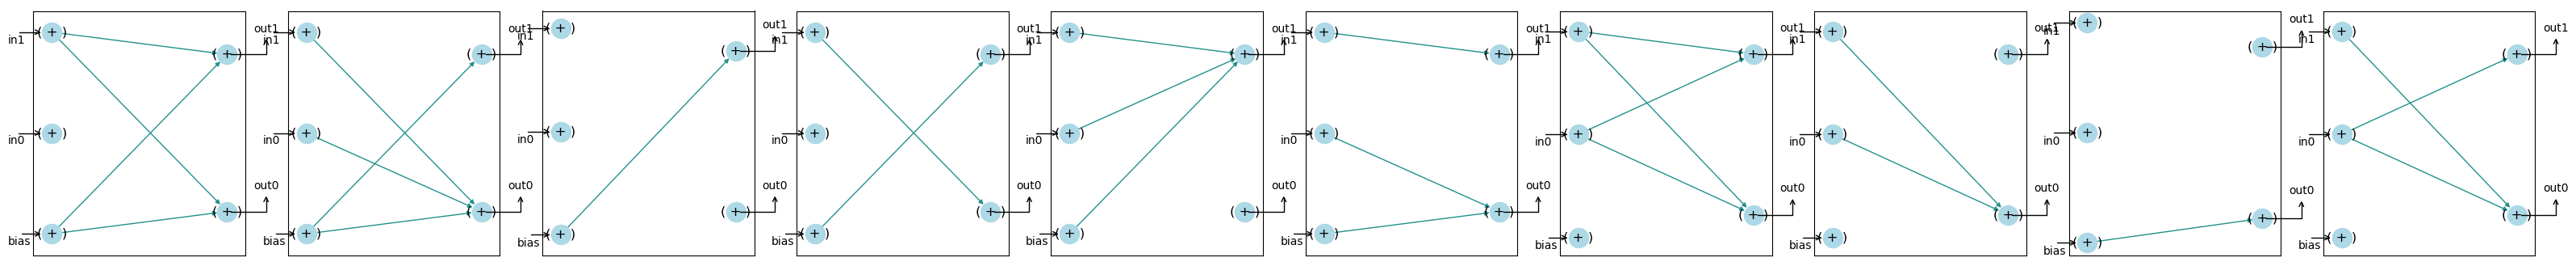

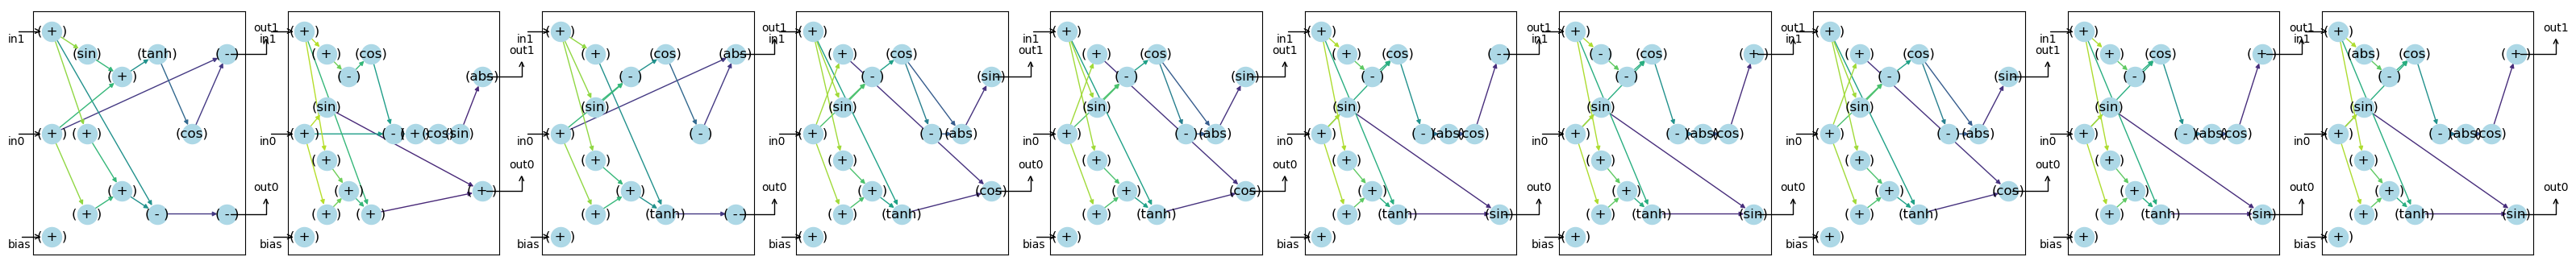

In [15]:
task = Task(games[hyp['task']], nReps=hyp['alg_nReps'], verbose=False)
wann = Wann(hyp)

maxGen = 50
for gen in range(maxGen):
    pop = wann.ask()  
    
    reward = task.evaluatePop(pop, hyp)  # Send pop to evaluate
    wann.tell(reward)           # Send fitness to WANN    
    data = gatherData(data,wann,gen,hyp)
    print(gen, ' - ', data.display())
    
    # Plot first generation
    if gen == 0:
        init_pop = copy.deepcopy(pop)
        fig = viewPop(pop[:10], 'xor', plt_height=4)
        
fig = viewPop(pop[:10], 'xor', plt_height=4)

In [14]:
np.median([ind.nConn for ind in pop])

6.0

# of Connections in ANN:  14


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17d7e3ebef0>)

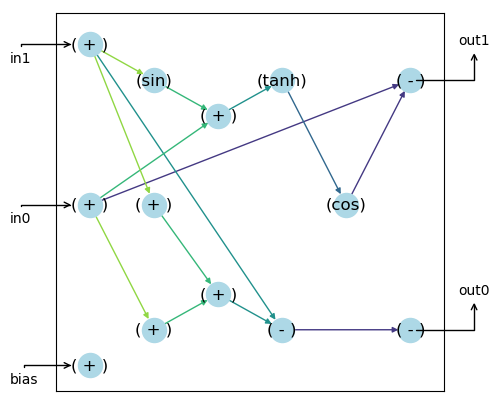

In [16]:
viewInd(pop[0],'xor')

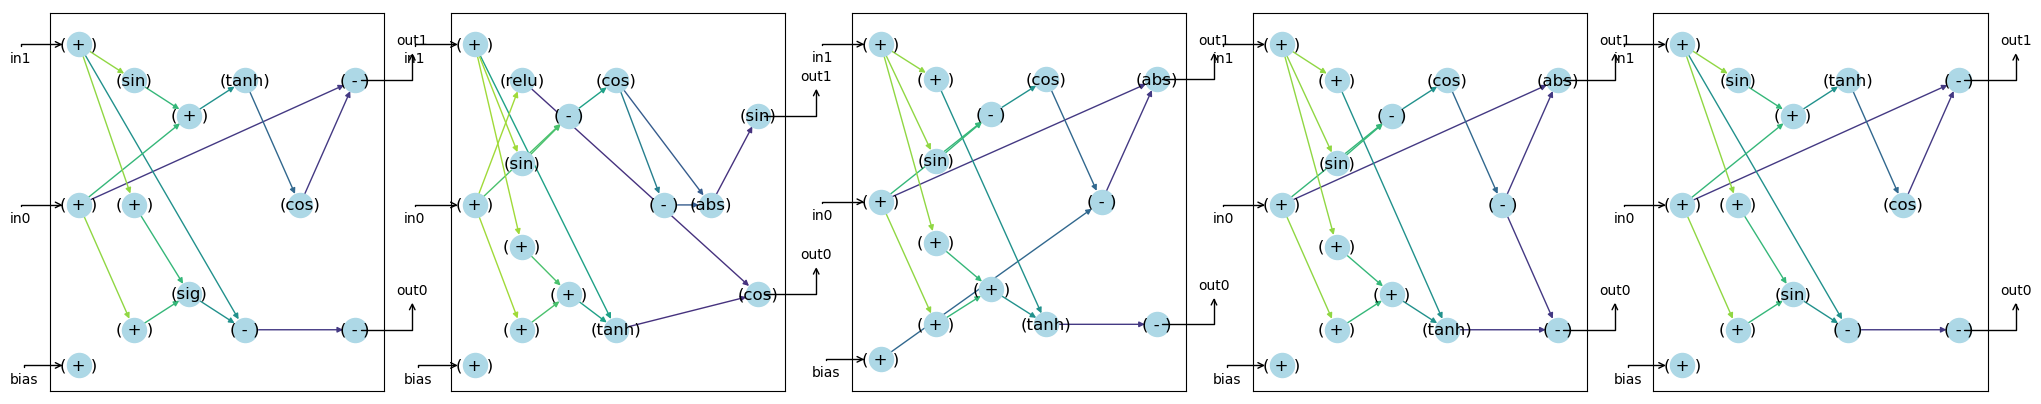

In [17]:
fig = viewPop(pop[-5:], 'xor')

# of Connections in ANN:  8


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25345957588>)

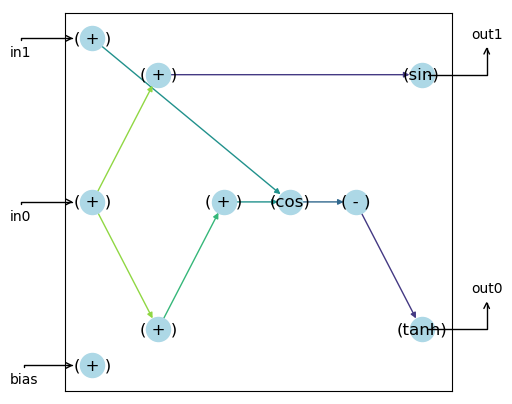

In [17]:
viewInd(pop[0], 'xor')

In [21]:
getLayer(pop[0].wMat)

array([0., 0., 0., 1., 1., 2., 3., 4., 5., 2.])

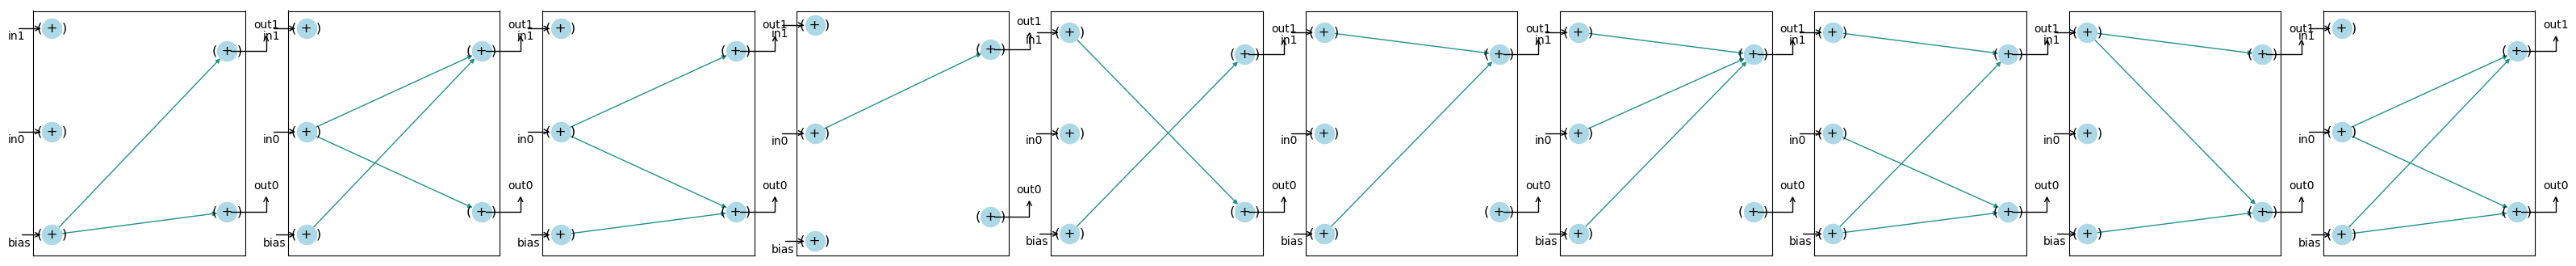

In [23]:
fig = viewPop(init_pop[:10], 'xor', plt_height=4)

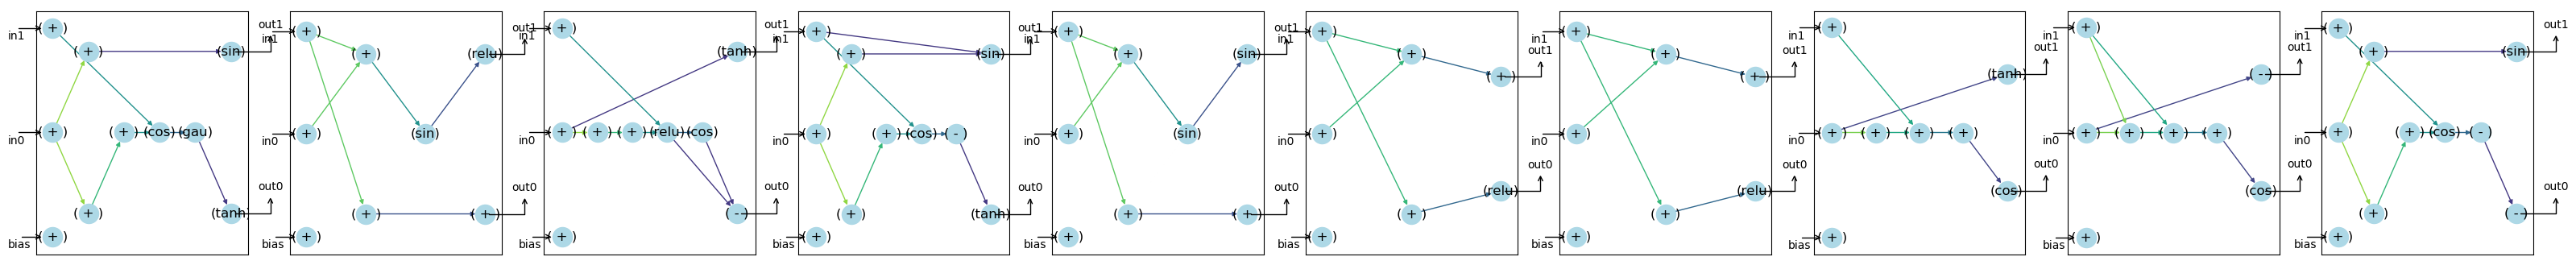

In [24]:
fig = viewPop(pop[-10:], 'xor', plt_height=4)

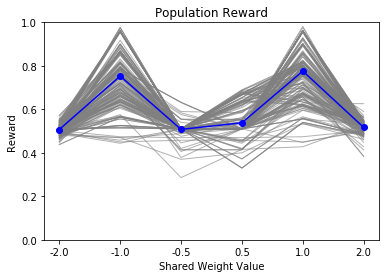

In [18]:
plotPopReward(pop, task, hyp)

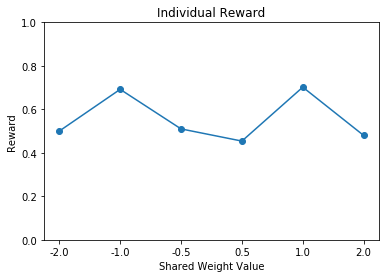

In [19]:
plotIndReward(pop[-2], task, hyp)

## Topology Search Operators

<img src="../img/operators.png" width="800"/>


(source: https://weightagnostic.github.io/)

## Mutate Add Node

connG    - (np_array) - connection genes

           [5 X nUniqueGenes] 
           [0,:] == Innovation Number (unique Id)
           [1,:] == Source Node Id
           [2,:] == Destination Node Id
           [3,:] == Weight Value
           [4,:] == Enabled?  

nodeG    - (np_array) - node genes

           [3 X nUniqueGenes]
           [0,:] == Node Id
           [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
           [2,:] == Activation function (as int)

innov    - (np_array) - innovation record

           [5 X nUniqueGenes]
           [0,:] == Innovation Number
           [1,:] == Source
           [2,:] == Destination
           [3,:] == New Node?
           [4,:] == Generation evolved
           
gen      - (int) - current generation

In [12]:
from wann_src._variation import mutAddNode

# of Connections in ANN:  2


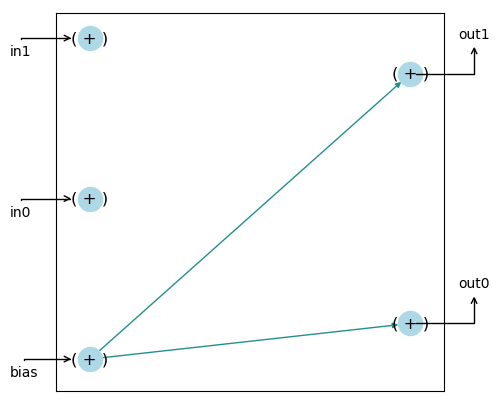

In [13]:
idx = 0 #np.random.randint(len(pop))
ind = pop[idx]

fig = viewInd(ind, 'xor', plt_height=5)

# of Connections in ANN:  3


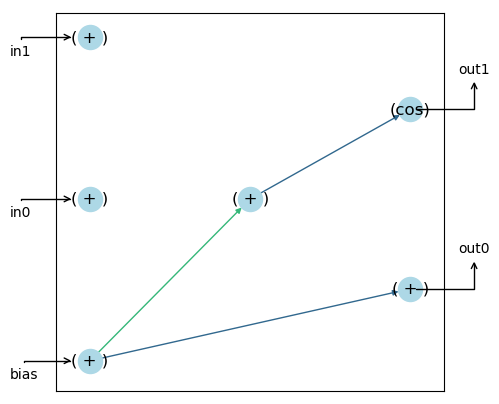

In [14]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

connG, nodeG, innov = wann.mutAddNode(connG, nodeG, innov, gen)
mutInd = Ind(connG, nodeG)

fig = viewInd(mutInd, 'xor', plt_height=5)

## Mutate Add Connection

connG    - (np_array) - connection genes

           [5 X nUniqueGenes] 
           [0,:] == Innovation Number (unique Id)
           [1,:] == Source Node Id
           [2,:] == Destination Node Id
           [3,:] == Weight Value
           [4,:] == Enabled?  

nodeG    - (np_array) - node genes

           [3 X nUniqueGenes]
           [0,:] == Node Id
           [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
           [2,:] == Activation function (as int)

innov    - (np_array) - innovation record

           [5 X nUniqueGenes]
           [0,:] == Innovation Number
           [1,:] == Source
           [2,:] == Destination
           [3,:] == New Node?
           [4,:] == Generation evolved
           
gen      - (int) - current generation

In [15]:
from wann_src._variation import mutAddConn

In [16]:
ind = mutInd

# of Connections in ANN:  3


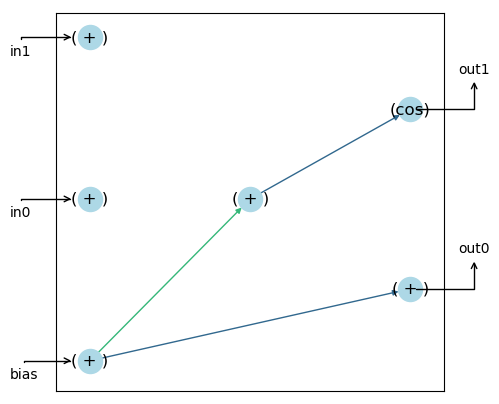

In [17]:
fig = viewInd(ind, 'xor', plt_height=5)

# of Connections in ANN:  4


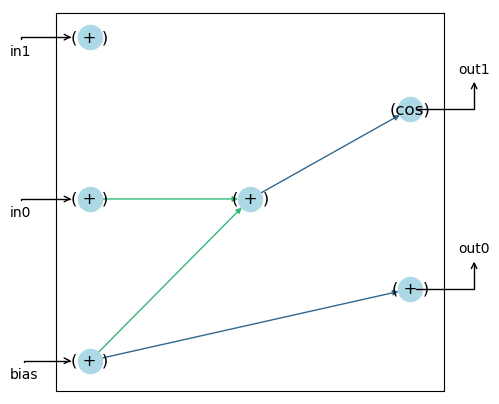

In [18]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

connG, innov = wann.mutAddConn(connG, nodeG, innov, gen)
mutInd = Ind(connG, nodeG)

fig = viewInd(mutInd, 'xor', plt_height=5)

## Topological Mutation

Args:

    child    - (Ind) - individual to be mutated
      .conns - (np_array) - connection genes
               [5 X nUniqueGenes] 
               [0,:] == Innovation Number (unique Id)
               [1,:] == Source Node Id
               [2,:] == Destination Node Id
               [3,:] == Weight Value
               [4,:] == Enabled?  
               
      .nodes - (np_array) - node genes
               [3 X nUniqueGenes]
               [0,:] == Node Id
               [1,:] == Type (1=input, 2=output 3=hidden 4=bias)
               [2,:] == Activation function (as int)
               
    innov    - (np_array) - innovation record
               [5 X nUniqueGenes]
               [0,:] == Innovation Number
               [1,:] == Source
               [2,:] == Destination
               [3,:] == New Node?
               [4,:] == Generation evolved

# of Connections in ANN:  3


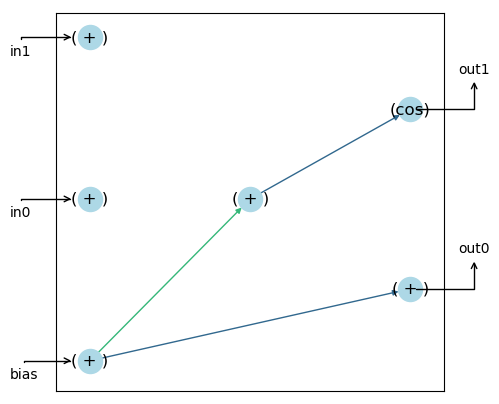

In [19]:
fig = viewInd(ind, 'xor', plt_height=5)

Choice: mutate activation
# of Connections in ANN:  3


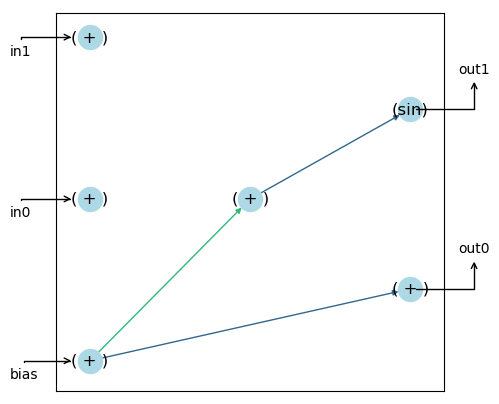

In [26]:
connG = ind.conn
nodeG = ind.node
innov = wann.innov
gen = 0

wann.verbose = True
child, innov = wann.topoMutate(ind, innov, gen)
wann.verbose = False

fig = viewInd(child, 'xor', plt_height=5)